In [267]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data Wrangling

### Load the Data

In [268]:
df = pd.read_csv("processed dataset.csv", sep=",") # loading the csv dataset into a pandas dataframe

In [269]:
df.head() # taking a look to the database columns

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,meal type,car parking,room type,lead time,market cluster,...,prev canc,not prev canc,price,special requests,date of reservation,status,number of people,number of nights,month,year
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,10/2/2015,Not_Canceled,2,7,10,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,11/6/2018,Not_Canceled,1,4,11,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,2/28/2018,Canceled,3,4,2,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,5/20/2017,Canceled,1,2,5,2017
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,4/11/2018,Canceled,1,3,4,2018


In [270]:
df.describe() # getting statistical information on the data distributions (especially count, mean and std)

,number of adults,number of children,number of weekend nights,number of week nights,car parking,lead time,repeated,prev canc,not prev canc,price,special requests,number of people,number of nights,month,year
count,33312.000000,33312.000000,33312.00000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000,33312.000000
mean,1.843390,0.080812,0.82763,2.218450,0.030319,77.805896,0.023625,0.022695,0.137158,102.574264,0.618816,1.924201,3.046079,7.342399,2017.815712
std,0.516951,0.341221,0.87518,1.419948,0.171467,72.831715,0.151880,0.375259,1.698035,27.723068,0.782676,0.609670,1.794292,3.093524,0.387957
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,2015.000000
25%,2.000000,0.000000,0.00000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.750000,0.000000,2.000000,2.000000,5.000000,2018.000000
50%,2.000000,0.000000,1.00000,2.000000,0.000000,56.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2.000000,3.000000,8.000000,2018.000000
75%,2.000000,0.000000,2.00000,3.000000,0.000000,118.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2.000000,4.000000,10.000000,2018.000000
max,4.000000,10.000000,7.00000,17.000000,1.000000,289.000000,1.000000,13.000000,58.000000,182.530000,5.000000,12.000000,24.000000,12.000000,2018.000000


### Explore the data

In [271]:
df.nunique() # understanding the number of possible values of the categorical attributes, it will be useful for the encoding

Booking_ID                  33312
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
meal type                       3
car parking                     2
room type                       7
lead time                     290
market cluster                  5
repeated                        2
prev canc                       9
not prev canc                  59
price                        3513
special requests                6
date of reservation           551
status                          2
number of people                8
number of nights               24
month                          12
year                            3
dtype: int64

In [272]:
df.isnull().sum() # checking if there are any missing values between the data

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
meal type                   0
car parking                 0
room type                   0
lead time                   0
market cluster              0
repeated                    0
prev canc                   0
not prev canc               0
price                       0
special requests            0
date of reservation         0
status                      0
number of people            0
number of nights            0
month                       0
year                        0
dtype: int64

In [273]:
df.info() # looking at datatype of all the attributes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33312 entries, 0 to 33311
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                33312 non-null  object 
 1   number of adults          33312 non-null  int64  
 2   number of children        33312 non-null  int64  
 3   number of weekend nights  33312 non-null  int64  
 4   number of week nights     33312 non-null  int64  
 5   meal type                 33312 non-null  object 
 6   car parking               33312 non-null  int64  
 7   room type                 33312 non-null  object 
 8   lead time                 33312 non-null  int64  
 9   market cluster            33312 non-null  object 
 10  repeated                  33312 non-null  int64  
 11  prev canc                 33312 non-null  int64  
 12  not prev canc             33312 non-null  int64  
 13  price                     33312 non-null  float64
 14  specia

### Encode the data

In [274]:
df["status"] = df["status"].apply(lambda x: 1 if x == "Canceled" else 0)
# encoding the "Canceled" / "Not_Canceled" status with a binary variable

In [275]:
df = pd.concat([df, pd.get_dummies(df["meal type"])], axis=1) # one hot encoding, low possible values
df = pd.concat([df, pd.get_dummies(df["market cluster"])], axis=1) # one hot encoding, low possible values
df["room type"] = df["room type"].astype("category").cat.codes # categorical encoding, high possible values

### Visualize the data

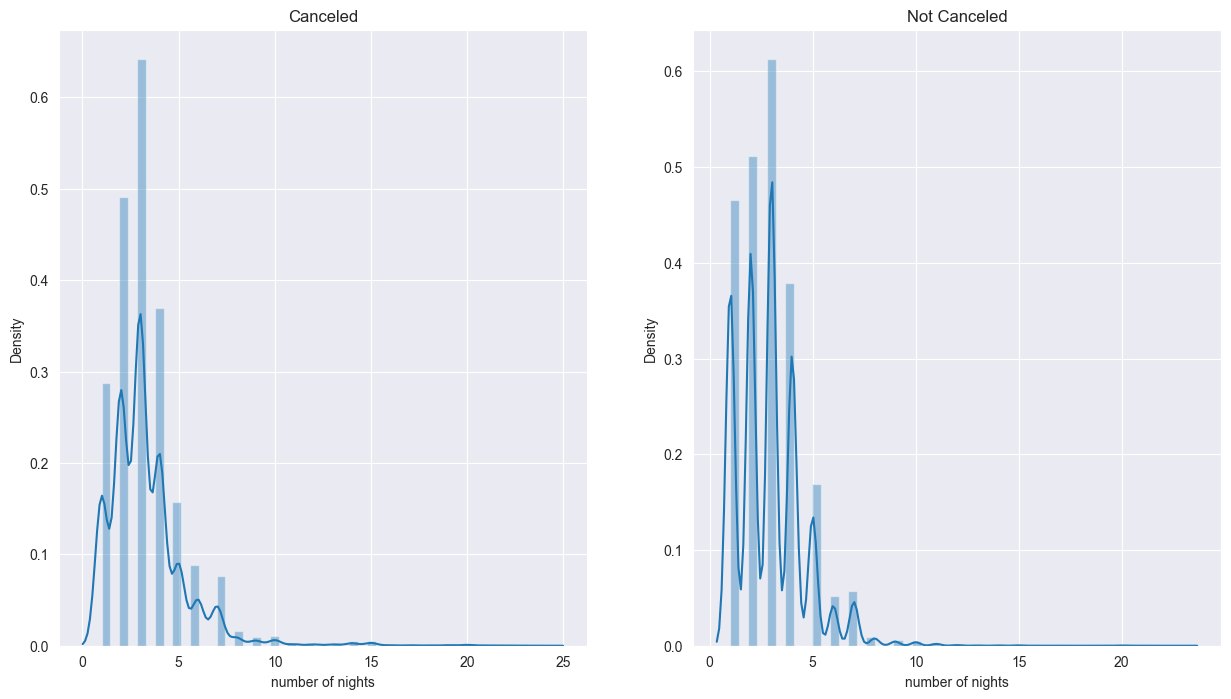

In [276]:
import warnings
warnings.filterwarnings('ignore') # only used because sns.distplot is now deprecated, but i am still using it in this version of the project

fig, ax = plt.subplots(figsize=(15, 8), ncols=2)
sns.distplot(df[df["status"] == 1]["number of nights"], ax=ax[0]).set_title("Canceled")
sns.distplot(df[df["status"] == 0]["number of nights"], ax=ax[1]).set_title("Not Canceled");
# we see that the distribution is almost the same --> in a contrary to what I expected the number of nights is not relevant

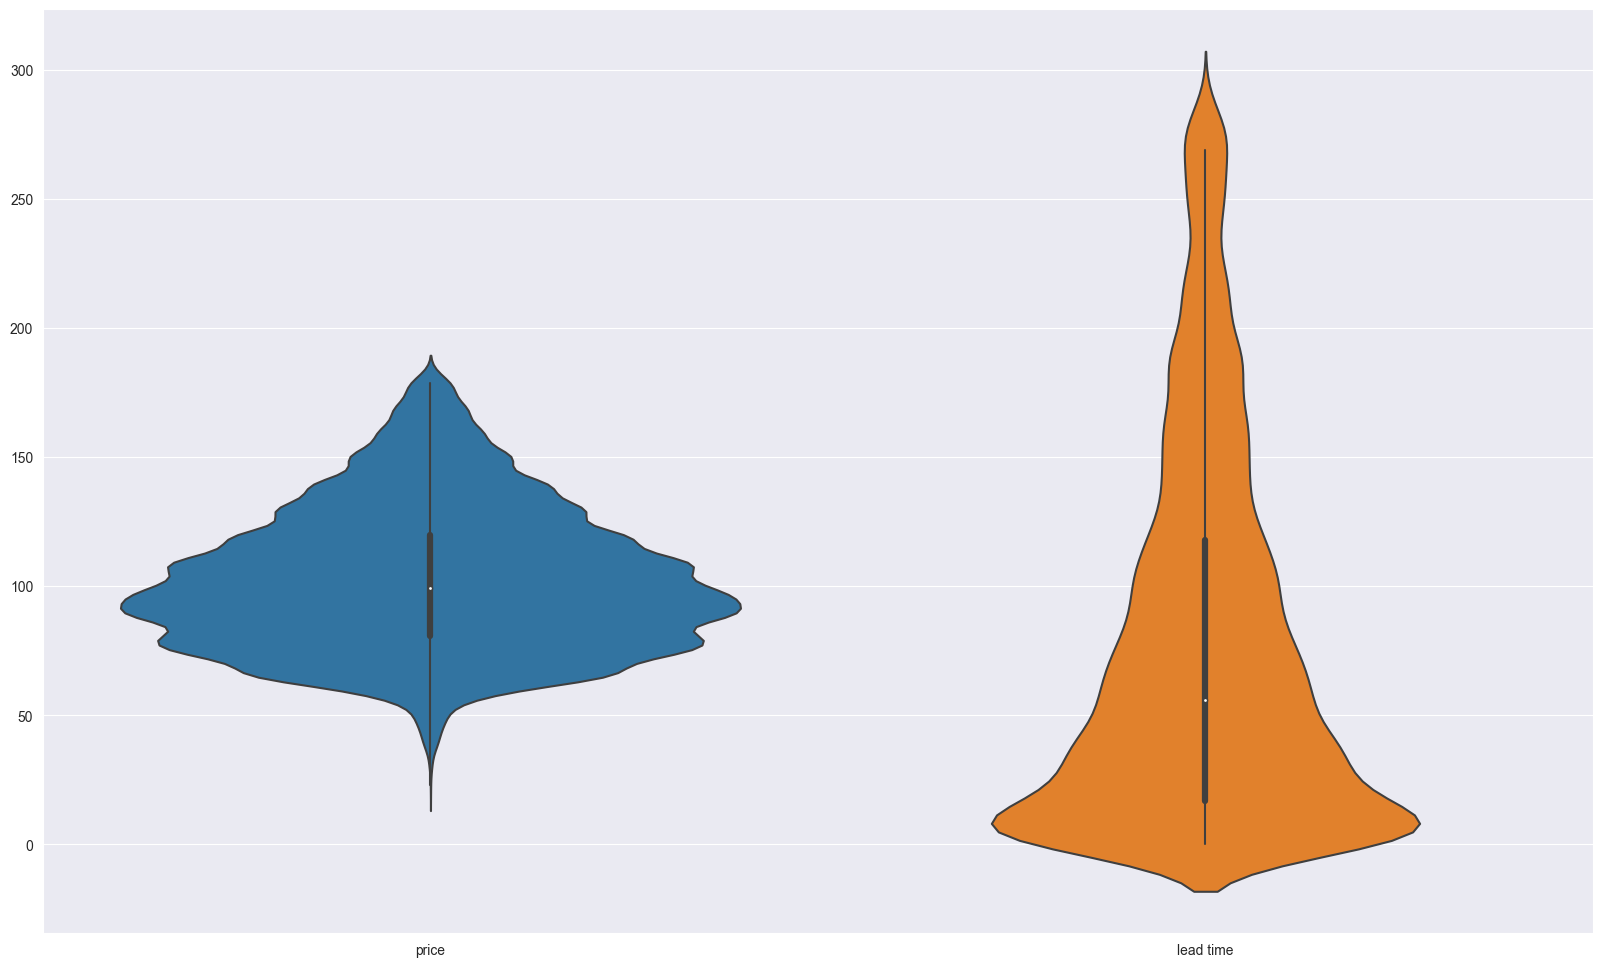

In [277]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.violinplot(df[["price", "lead time"]] , ax=ax);
# The price is very much centered around the median, while there is more variance on the lead time. Anyway there are no outliers sice I removed them in the preprocess phase --> file preprocess.ipynb

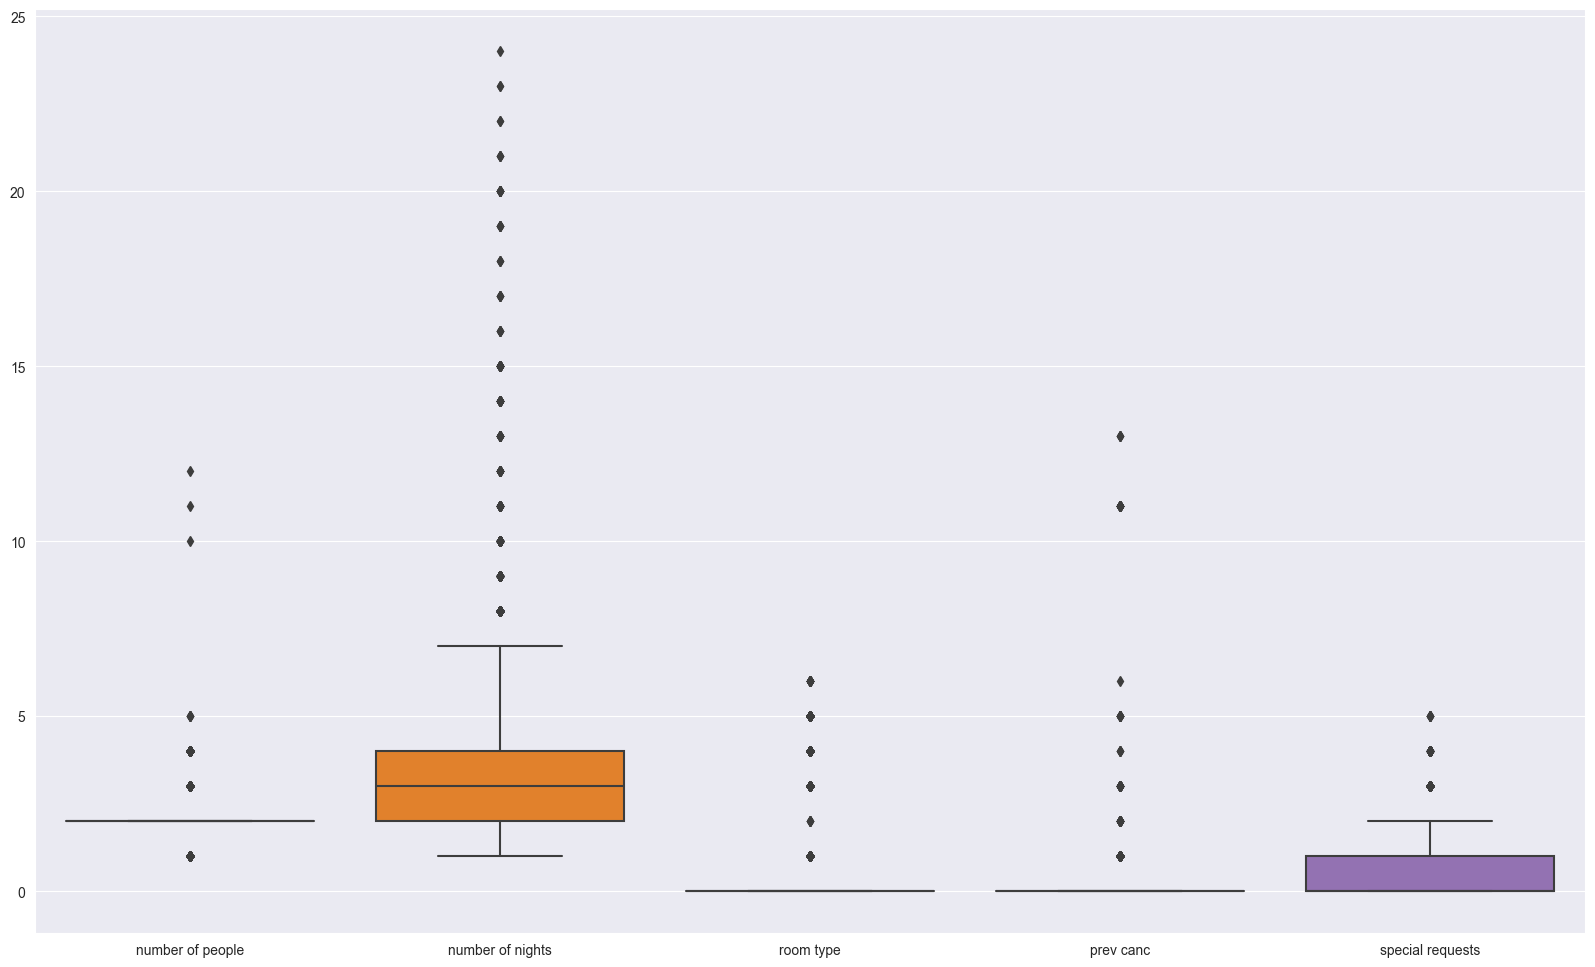

In [278]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.boxplot(df[["number of people", "number of nights", "room type", "prev canc", "special requests"]] , ax=ax);
# All these descriptive attributes seems to be quite homogeneous, a part of the "number of nights". That is reasonable, because there will necessarily be a small number of customers who needs long booking, maybe for work related reasons

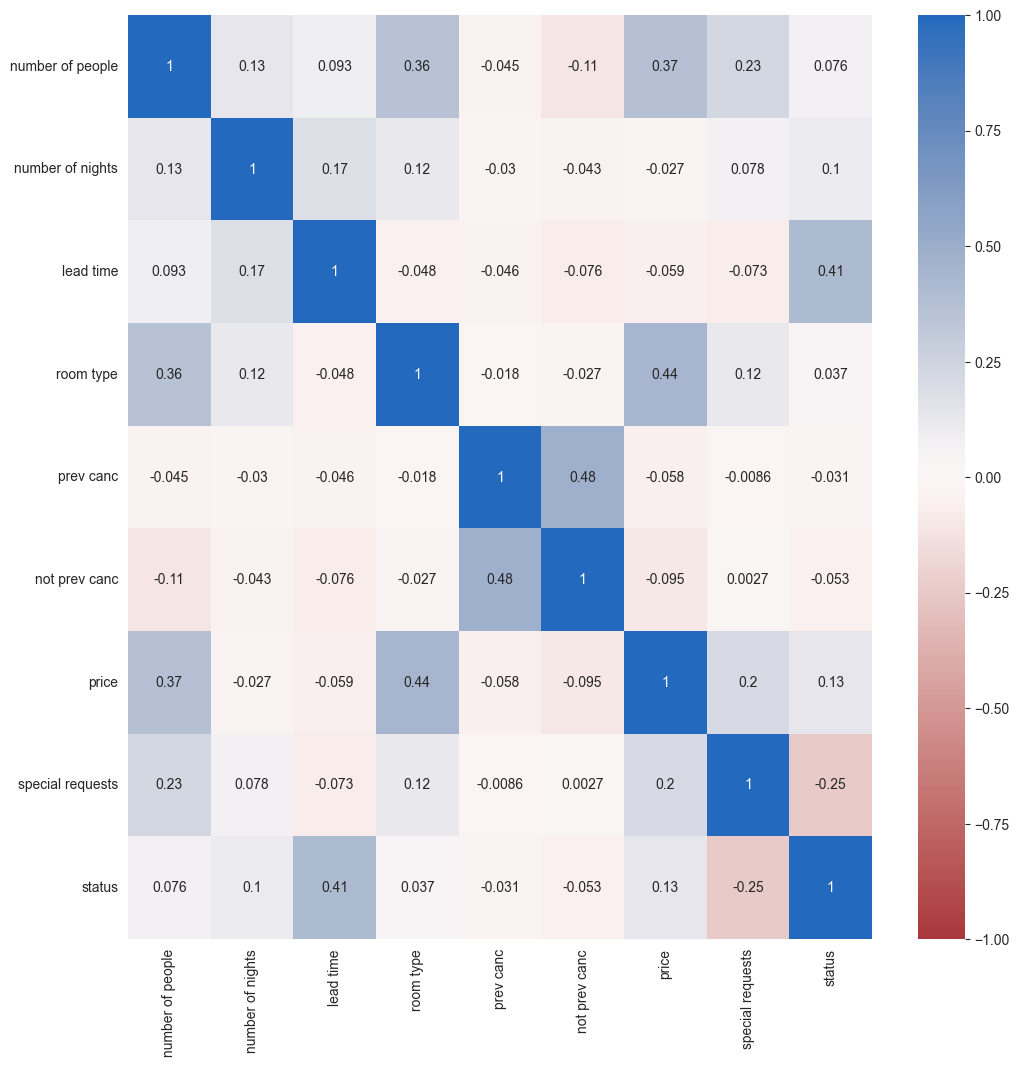

In [279]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df[["number of people", "number of nights", "lead time", "room type", "prev canc", "not prev canc", "price", "special requests", "status"]].corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1, ax=ax);
# We clearly see that "prev canc" and "not prev canc" have an interesting correlation. There are also obvious correlations, for example, "number of people" with "price" and "special requests". Finally, "lead time" and "special requests" are the only feaures stringly correlated with the status attribute --> they seems to be the most informative attributes

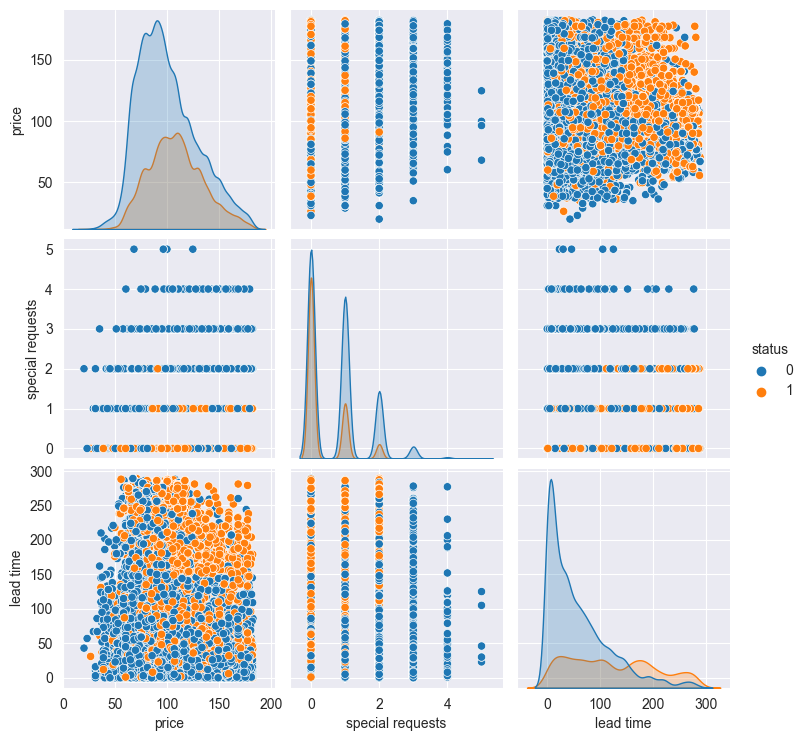

In [280]:
sns.pairplot(df[["price", "special requests", "lead time", "status"]], hue="status");
# Here I am plotting all the combination of the 3 attributes that seems the most interesting so far, keeping an eye on the status of each datapoint. Those charts are confirming the previous and proving a nice overview of the most important trends

### Clean the data

In [281]:
df.drop("Booking_ID", axis=1, inplace=True) # this is useless for this kind of analysis

df.drop("date of reservation", axis=1, inplace=True) # I already have the year and month attribute, i don't need the day
df.drop("meal type", axis=1, inplace=True) # Encoded before, now are not needed anymore
df.drop("market cluster", axis=1, inplace=True) # Encoded before, now are not needed anymore

In [282]:
df.dropna(inplace=True) # drop possible null / missing values created during the previous analysis

In [283]:
f"The new dataset has {len(df.columns)} features and {len(df)} samples" # shape of the new dataset

'The new dataset has 25 features and 33312 samples'

### Inspect new dataset, ready for learning

In [284]:
df.head() # getting a look at the cleaned dataframe

,number of adults,number of children,number of weekend nights,number of week nights,car parking,room type,lead time,repeated,prev canc,not prev canc,...,month,year,Meal Plan 1,Meal Plan 2,Not Selected,Aviation,Complementary,Corporate,Offline,Online
0,1,1,2,5,0,0,224,0,0,0,...,10,2015,True,False,False,False,False,False,True,False
1,1,0,1,3,0,0,5,0,0,0,...,11,2018,False,False,True,False,False,False,False,True
2,2,1,1,3,0,0,1,0,0,0,...,2,2018,True,False,False,False,False,False,False,True
3,1,0,0,2,0,0,211,0,0,0,...,5,2017,True,False,False,False,False,False,False,True
4,1,0,1,2,0,0,48,0,0,0,...,4,2018,False,False,True,False,False,False,False,True


# Learning from the data

### Normalize the data

In [285]:
numerical_columns = ["number of adults", "number of children", "number of people", "number of weekend nights", "number of week nights", "number of nights", "lead time", "prev canc", "not prev canc", "price", "special requests", "month", "year"]
df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()
# Gaussian normalization of the attributes, in order to help the learning process

### Split the data

In [286]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(df.drop("status", axis=1), df["status"], test_size=0.2, random_state=12)

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# splitting the training and test dataset and converting from pandas dataframe to numpy array

### Prepare and Tune the Neural Network

In [287]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"), # relu for preventing overfitting
    tf.keras.layers.Dropout(0.20), # Small dropout for preventing overfitting
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # sigmoid for classifying the datapoint
])

In [288]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # providing the instruction for learning

In [289]:
fit_data = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=None) # fitting the model on the training data

Epoch 1/10
750/750 [==============================] - 2s 1ms/step - loss: 0.4633 - accuracy: 0.7827 - val_loss: 0.4033 - val_accuracy: 0.8225
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8109 - val_loss: 0.3854 - val_accuracy: 0.8278
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3996 - accuracy: 0.8194 - val_loss: 0.3750 - val_accuracy: 0.8319
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8249 - val_loss: 0.3780 - val_accuracy: 0.8402
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3863 - accuracy: 0.8270 - val_loss: 0.3664 - val_accuracy: 0.8349
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3789 - accuracy: 0.8295 - val_loss: 0.3618 - val_accuracy: 0.8345
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8348 - val_loss: 0.3592 - val_accuracy: 0.8413
Epoch 

### Evaluate the performance of the model

In [290]:
f"The accuracy of the model on the testing dataset is: {100 * round(model.evaluate(x_test, y_test)[1], 2)}%" # evaluate the model

209/209 [==============================] - 0s 800us/step - loss: 0.3435 - accuracy: 0.8423


'The accuracy of the model on the testing dataset is: 84.0%'

# Interpretability of the Network

### Apply the SHAP method to explain correlation between feaures in the dataset and "canceled label"

In [291]:
import shap
# SHAP is a relevant method for expandability of neural networks, based on game theory. It works by setting up a collaborative game between the features and finally extracting the most powerful ones -- more predictive power

In [292]:
explainer = shap.Explainer(model.predict, x_train, feature_names=df.drop("status", axis=1).columns)
# initializing a shap explainer based on the previous neural network

In [293]:
shap_values = explainer(x_test[:10]) # apply shap method to identify the most important features
# I am only analyzing the first 10 entries of the testing set because the execution time is very high for big datasets

43/43 [==============================] - 0s 688us/step


PermutationExplainer explainer:  70%|███████   | 7/10 [00:00<?, ?it/s]

54/54 [==============================] - 0s 747us/step


PermutationExplainer explainer:  90%|█████████ | 9/10 [00:11<00:00,  1.35it/s]

52/52 [==============================] - 0s 762us/step


PermutationExplainer explainer: 100%|██████████| 10/10 [00:13<00:00,  1.04s/it]

49/49 [==============================] - 0s 715us/step


PermutationExplainer explainer: 11it [00:14,  3.61s/it]                        


### Plot the result of the Neural Network Analysis

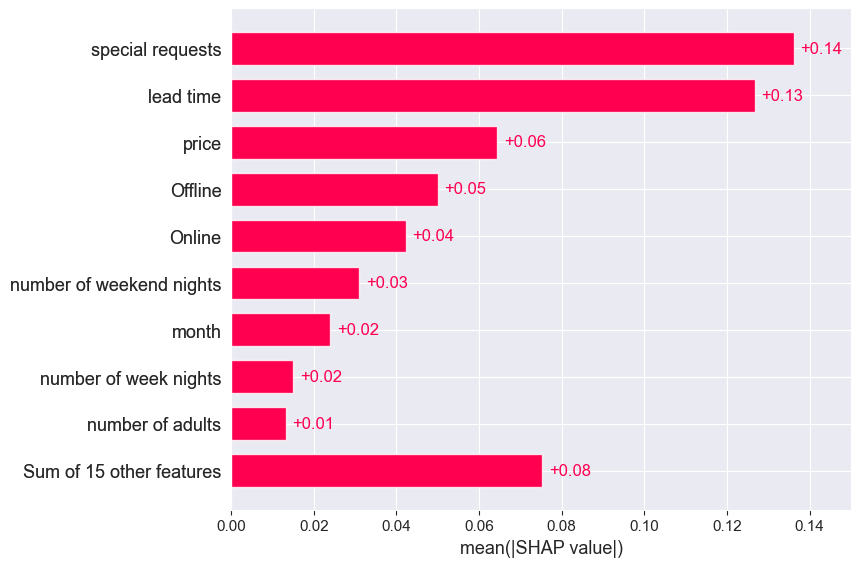

In [294]:
shap.plots.bar(shap_values)
# Plot the importance of the main attributes --> as often happens, a small number of features contains the majority of the information. "special requests" and "lead time" are clearly the most important ones. The "price" is also relevant, and even the "market cluster" has some amount of influence. All the other features are basically negligible

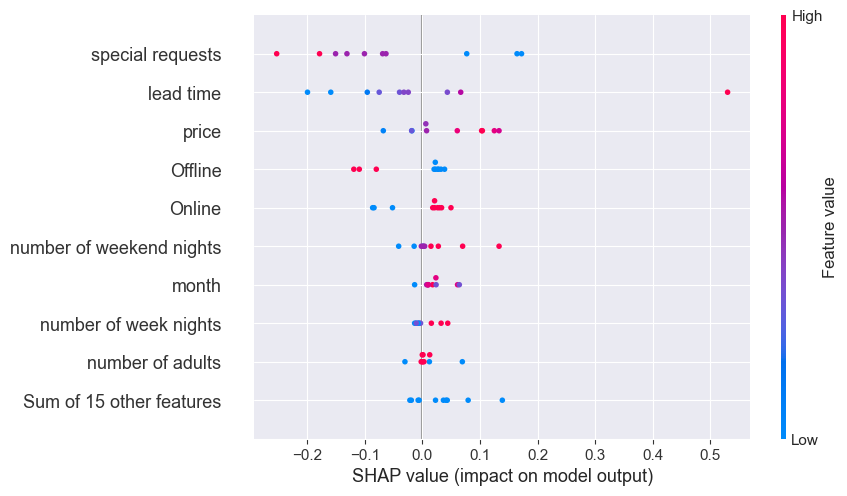

In [295]:
shap.plots.beeswarm(shap_values) # here we see the specific influence (negative or positive) on all datapoints

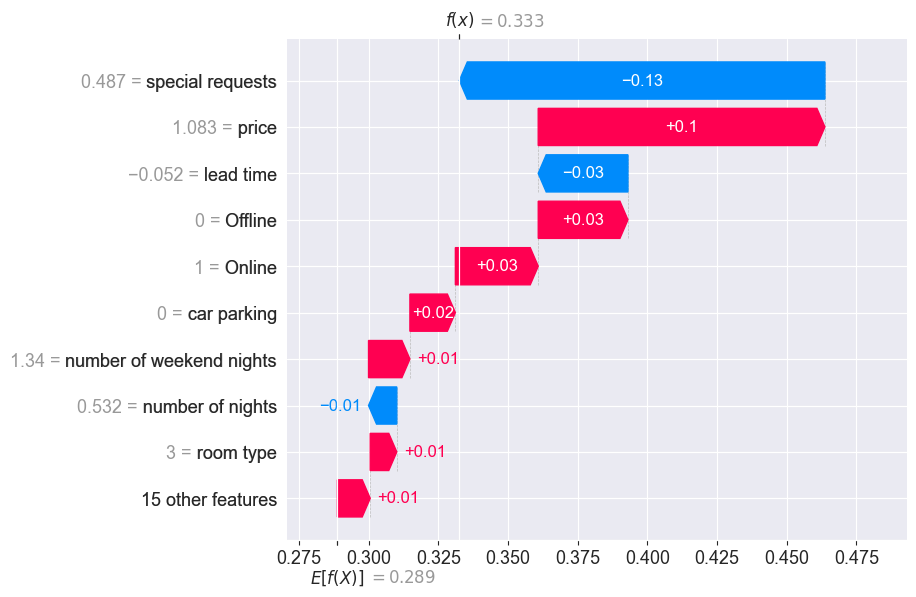

In [296]:
shap.plots.waterfall(shap_values[0])
# Finally, we can even see the exact numerical contributions of each attribute towards the decision of neural network, which is a very nice way of interpreting the attributes and their relationship. This datapoint is correctly classified as "Not Canceled"

## In conclusion, i am satisfied with this work because it provides a nice way of doing data analysis and correlation, referring to all the attributes of the dataset. The particular thing is, that is based on machine learning, instead of classical statistical analysis. By the way the results, as we can see from the plots, are basically the same